## HR Analytics Case Study Using Logistic Regression
###### By M.Phaneeshwar

#### Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

#### Goal of the case study
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
general_data = pd.read_csv('general_data.csv')
emp_data = pd.read_csv('employee_survey_data.csv')
in_time = pd.read_csv('in_time.csv')
manager_data = pd.read_csv('manager_survey_data.csv')
out_time = pd.read_csv('out_time.csv')

In [3]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
emp_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [5]:
manager_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [6]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [7]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [8]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [9]:
general_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [11]:
in_time = in_time.replace(np.nan,0)
out_time = out_time.replace(np.nan,0)
in_time.iloc[:,1:] = in_time.iloc[:,1:].apply(pd.to_datetime,errors='coerce')
out_time.iloc[:,1:] = out_time.iloc[:,1:].apply(pd.to_datetime,errors='coerce')

In [12]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [13]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,1970-01-01 00:00:00,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,1970-01-01,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,1970-01-01,2015-01-02 18:22:17,2015-01-05 17:48:22,1970-01-01 00:00:00,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,1970-01-01 00:00:00,1970-01-01,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,1970-01-01,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,1970-01-01,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,1970-01-01,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,1970-01-01,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,1970-01-01,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,1970-01-01,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [14]:
time = pd.concat([in_time,out_time],axis = 0)

In [15]:
time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,1970-01-01,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,1970-01-01,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,1970-01-01,2015-01-02 16:19:01,1970-01-01 00:00:00,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,1970-01-01,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,1970-01-01,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,1970-01-01,2015-12-28 17:43:28,1970-01-01 00:00:00,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,1970-01-01,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,1970-01-01 00:00:00,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,1970-01-01,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [16]:
time = time.diff(periods = 4410)  # To determine the duration of the employee per day in office
time = time.iloc[4410:,:]
time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,0 days,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,...,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,0 days,07:46:26,07:18:54,07:46:44,07:04:49
1,0.0,0 days,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,...,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,0 days,07:36:53,07:58:57,07:59:10,08:13:38
2,0.0,0 days,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,...,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,0 days,07:01:26,07:26:20,07:32:20,06:47:11
3,0.0,0 days,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,...,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,0 days,07:26:50,07:25:00,07:21:59,07:07:59
4,0.0,0 days,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,...,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,0 days,07:39:44,08:16:07,07:57:12,08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.0,0 days,08:07:05,08:50:27,08:23:58,08:50:42,08:13:25,08:16:51,08:21:38,08:45:33,...,08:04:59,08:09:41,08:17:33,08:36:16,08:35:49,0 days,08:28:56,09:04:29,08:56:37,08:30:29
4406,0.0,0 days,06:15:20,00:00:00,05:23:37,05:43:40,06:11:36,05:42:52,06:03:10,06:17:32,...,05:55:30,05:49:50,05:55:29,06:06:38,05:59:34,0 days,05:40:11,06:33:30,05:42:08,06:08:51
4407,0.0,0 days,07:16:34,07:35:07,07:38:29,07:59:10,07:17:47,07:01:54,07:46:33,07:28:42,...,07:47:08,07:51:58,07:45:13,07:45:08,07:24:07,0 days,07:44:04,00:00:00,07:45:38,08:05:25
4408,0.0,0 days,09:31:32,09:35:13,09:47:18,09:23:28,09:12:16,00:00:00,09:17:39,09:35:59,...,09:58:11,09:20:27,09:22:21,09:14:30,09:41:52,0 days,10:03:11,09:00:44,09:21:38,09:36:58


In [17]:
x = pd.DataFrame((time.nunique() == 1).reset_index(level=0)).rename(columns={'index':'Dates',0:'bol'})
dates = list(x[x.bol == True].Dates)

In [18]:
dates

['Unnamed: 0',
 '2015-01-01',
 '2015-01-14',
 '2015-01-26',
 '2015-03-05',
 '2015-05-01',
 '2015-07-17',
 '2015-09-17',
 '2015-10-02',
 '2015-11-09',
 '2015-11-10',
 '2015-11-11',
 '2015-12-25']

In [19]:
time.drop(dates,inplace = True, axis = 1)

In [20]:
time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,00:00:00,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49
1,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:55:42,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38
2,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,07:13:06,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11
3,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:27:21,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59
4,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,08:19:12,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05


In [21]:
time['Avg_Time'] = time.mean(axis = 1)

In [22]:
time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Avg_Time
0,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,06:52:12.823293
1,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,07:18:57.493975
2,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,06:48:57.891566
3,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,06:47:21.172690
4,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,07:52:39.220883


In [23]:
time['Hrs'] = time['Avg_Time'] / np.timedelta64(1,'h')

In [24]:
time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Avg_Time,Hrs
0,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,06:52:12.823293,6.870229
1,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,07:18:57.493975,7.315971
2,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,06:48:57.891566,6.816081
3,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,06:47:21.172690,6.789215
4,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,07:52:39.220883,7.877561


In [25]:
time = time.reset_index(level=0).rename(columns = {'index':'EmployeeID'})

In [26]:
time.EmployeeID = time.EmployeeID.apply(lambda x: x+1)

In [27]:
time.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Avg_Time,Hrs
0,1,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,...,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,06:52:12.823293,6.870229
1,2,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,...,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,07:18:57.493975,7.315971
2,3,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,...,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,06:48:57.891566,6.816081
3,4,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,...,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,06:47:21.172690,6.789215
4,5,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,...,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,07:52:39.220883,7.877561


In [28]:
time_Avg = time.drop(time.columns.difference(['EmployeeID','Hrs']),axis = 1)

In [29]:
time_Avg.head()

,EmployeeID,Hrs
0,1,6.870229
1,2,7.315971
2,3,6.816081
3,4,6.789215
4,5,7.877561


###### Merging all the dataset into general_data

In [30]:
general_data = pd.merge(general_data,time_Avg, how='inner',on = 'EmployeeID')

In [31]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Hrs
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,Y,15,8,3,5.0,2,5,0,3,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,Y,11,8,3,13.0,5,8,7,5,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,Y,12,8,2,9.0,2,6,0,4,7.877561


In [32]:
emp_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [33]:
manager_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [34]:
general_data = pd.merge(general_data,emp_data,how = 'inner',on = 'EmployeeID')
general_data = pd.merge(general_data,manager_data,how = 'inner', on = 'EmployeeID')

In [35]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Hrs,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,6.870229,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,7.315971,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,6.816081,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,6.789215,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,7.877561,4.0,1.0,3.0,3,3


In [36]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [37]:
general_data.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [38]:
general_data.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
Hrs                        4406
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
JobInvolvement                4
PerformanceRating             2
dtype: int64

In [39]:
drop_col = ['EmployeeCount','Over18','StandardHours','PerformanceRating']

In [40]:
general_data.drop(drop_col,axis = 1,inplace = True)

In [41]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Hrs,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,6.870229,3.0,4.0,2.0,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,7.315971,3.0,2.0,4.0,2
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,5.0,2,5,0,3,6.816081,2.0,2.0,1.0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,13.0,5,8,7,5,6.789215,4.0,4.0,3.0,2
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,9.0,2,6,0,4,7.877561,4.0,1.0,3.0,3


In [42]:
round(100 * general_data.isnull().sum() / len(general_data),2)

Age                        0.00
Attrition                  0.00
BusinessTravel             0.00
Department                 0.00
DistanceFromHome           0.00
Education                  0.00
EducationField             0.00
EmployeeID                 0.00
Gender                     0.00
JobLevel                   0.00
JobRole                    0.00
MaritalStatus              0.00
MonthlyIncome              0.00
NumCompaniesWorked         0.43
PercentSalaryHike          0.00
StockOptionLevel           0.00
TotalWorkingYears          0.20
TrainingTimesLastYear      0.00
YearsAtCompany             0.00
YearsSinceLastPromotion    0.00
YearsWithCurrManager       0.00
Hrs                        0.00
EnvironmentSatisfaction    0.57
JobSatisfaction            0.45
WorkLifeBalance            0.86
JobInvolvement             0.00
dtype: float64

In [43]:
general_data = general_data[~general_data.NumCompaniesWorked.isnull()]

In [44]:
general_data = general_data[~general_data.EnvironmentSatisfaction.isnull()]

In [45]:
general_data = general_data[~general_data.JobSatisfaction.isnull()]

In [46]:
general_data = general_data[~general_data.WorkLifeBalance.isnull()]

In [47]:
general_data = general_data[~general_data.TotalWorkingYears.isnull()]

In [48]:
general_data = general_data[~general_data.Education.isnull()]

In [49]:
(100 * general_data.isnull().sum() / len(general_data))

Age                        0.0
Attrition                  0.0
BusinessTravel             0.0
Department                 0.0
DistanceFromHome           0.0
Education                  0.0
EducationField             0.0
EmployeeID                 0.0
Gender                     0.0
JobLevel                   0.0
JobRole                    0.0
MaritalStatus              0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
PercentSalaryHike          0.0
StockOptionLevel           0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
YearsAtCompany             0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
Hrs                        0.0
EnvironmentSatisfaction    0.0
JobSatisfaction            0.0
WorkLifeBalance            0.0
JobInvolvement             0.0
dtype: float64

In [50]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
Age                        4300 non-null int64
Attrition                  4300 non-null object
BusinessTravel             4300 non-null object
Department                 4300 non-null object
DistanceFromHome           4300 non-null int64
Education                  4300 non-null int64
EducationField             4300 non-null object
EmployeeID                 4300 non-null int64
Gender                     4300 non-null object
JobLevel                   4300 non-null int64
JobRole                    4300 non-null object
MaritalStatus              4300 non-null object
MonthlyIncome              4300 non-null int64
NumCompaniesWorked         4300 non-null float64
PercentSalaryHike          4300 non-null int64
StockOptionLevel           4300 non-null int64
TotalWorkingYears          4300 non-null float64
TrainingTimesLastYear      4300 non-null int64
YearsAtCompany             4300 non-

In [51]:
num_to_cat = ['Education','JobLevel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement']

In [52]:
len(num_to_cat)

6

In [53]:
general_data.Education = general_data.Education.map({1:"Education_level_1",2: 'Education_level_2', 3: 'Education_level_3',4: 'Education_level_4',5:'Education_level_5'}) 
general_data.JobLevel = general_data.JobLevel.map({1:"JobLevel_1",2: 'JobLevel_2', 3: 'JobLevel_3',4: 'JobLevel_4',5:'JobLevel_5'}) 
general_data['EnvironmentSatisfaction'] = general_data['EnvironmentSatisfaction'].map({1:'Env_Low',2:'Env_Medium',3:'Env_High',4:'Env_VeryHigh'})
general_data.JobSatisfaction = general_data.JobSatisfaction.map({1:'JobSat_Low',2:'JobSat_Medium',3:'JobSat_High',4:'JobSat_VeryHigh'})
general_data.WorkLifeBalance = general_data.WorkLifeBalance.map({1:'WLB_Low',2:'WLB_Medium',3:'WLB_High',4:'WLB_VeryHigh'})
general_data.JobInvolvement = general_data.JobInvolvement.map({1:'JobInv_Low',2:'JobInv_Medium',3:'JobInv_High',4:'JobInv_VeryHigh'})

In [54]:
general_data.Attrition.value_counts()

No     3605
Yes     695
Name: Attrition, dtype: int64

In [55]:
general_data.Attrition = general_data.Attrition.map({'Yes':1,'No':0})

In [56]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
Age                        4300 non-null int64
Attrition                  4300 non-null int64
BusinessTravel             4300 non-null object
Department                 4300 non-null object
DistanceFromHome           4300 non-null int64
Education                  4300 non-null object
EducationField             4300 non-null object
EmployeeID                 4300 non-null int64
Gender                     4300 non-null object
JobLevel                   4300 non-null object
JobRole                    4300 non-null object
MaritalStatus              4300 non-null object
MonthlyIncome              4300 non-null int64
NumCompaniesWorked         4300 non-null float64
PercentSalaryHike          4300 non-null int64
StockOptionLevel           4300 non-null int64
TotalWorkingYears          4300 non-null float64
TrainingTimesLastYear      4300 non-null int64
YearsAtCompany             4300 non

In [57]:
cat_var = ['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement']

In [58]:
dummy1 = pd.get_dummies(general_data[cat_var],drop_first = True)

In [59]:
general_data = pd.concat([general_data,dummy1],axis = 1)

In [60]:
general_data.drop(cat_var,axis = 1, inplace = True)

In [61]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 54 columns):
Age                                     4300 non-null int64
Attrition                               4300 non-null int64
DistanceFromHome                        4300 non-null int64
EmployeeID                              4300 non-null int64
MonthlyIncome                           4300 non-null int64
NumCompaniesWorked                      4300 non-null float64
PercentSalaryHike                       4300 non-null int64
StockOptionLevel                        4300 non-null int64
TotalWorkingYears                       4300 non-null float64
TrainingTimesLastYear                   4300 non-null int64
YearsAtCompany                          4300 non-null int64
YearsSinceLastPromotion                 4300 non-null int64
YearsWithCurrManager                    4300 non-null int64
Hrs                                     4300 non-null float64
BusinessTravel_Travel_Frequently        4300 no

In [62]:
general_data.drop('EmployeeID',axis = 1, inplace = True)

##### Train-Test Split

In [63]:
import sklearn
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(general_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [64]:
df_train.shape

(3010, 53)

In [65]:
df_test.shape

(1290, 53)

###### Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Hrs']
df_train[cols] = scaler.fit_transform(df_train[cols])
df_train.head()

C:\Users\Eeshwar\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Eeshwar\Anaconda3\envs\tensorflow-sessions\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,EnvironmentSatisfaction_Env_VeryHigh,JobSatisfaction_JobSat_Low,JobSatisfaction_JobSat_Medium,JobSatisfaction_JobSat_VeryHigh,WorkLifeBalance_WLB_Low,WorkLifeBalance_WLB_Medium,WorkLifeBalance_WLB_VeryHigh,JobInvolvement_JobInv_Low,JobInvolvement_JobInv_Medium,JobInvolvement_JobInv_VeryHigh
3055,-1.079649,0,-0.89135,-0.882291,-0.681073,-0.883030,0.232533,-0.798385,-0.614798,-0.326287,...,1,0,1,0,0,0,0,0,0,0
1262,1.224511,1,-0.89135,-0.407388,2.505296,0.210427,-0.937907,1.516777,2.473298,-0.986095,...,0,0,0,0,0,0,0,1,0,0
1675,-1.189371,1,-1.01475,-0.869692,-0.681073,1.850611,-0.937907,-1.312865,0.157226,-0.986095,...,0,0,0,1,1,0,0,1,0,0
2410,-0.421318,0,1.08305,-0.024306,-0.681073,-0.609666,-0.937907,-0.541144,2.473298,-0.161335,...,0,0,0,1,0,0,0,0,1,0
4404,-0.860205,0,-0.64455,-0.632027,-0.681073,0.757155,-0.937907,-0.669765,-0.614798,-0.161335,...,0,0,0,1,0,0,0,0,1,0


In [67]:
df_train.head()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,EnvironmentSatisfaction_Env_VeryHigh,JobSatisfaction_JobSat_Low,JobSatisfaction_JobSat_Medium,JobSatisfaction_JobSat_VeryHigh,WorkLifeBalance_WLB_Low,WorkLifeBalance_WLB_Medium,WorkLifeBalance_WLB_VeryHigh,JobInvolvement_JobInv_Low,JobInvolvement_JobInv_Medium,JobInvolvement_JobInv_VeryHigh
3055,-1.079649,0,-0.89135,-0.882291,-0.681073,-0.883030,0.232533,-0.798385,-0.614798,-0.326287,...,1,0,1,0,0,0,0,0,0,0
1262,1.224511,1,-0.89135,-0.407388,2.505296,0.210427,-0.937907,1.516777,2.473298,-0.986095,...,0,0,0,0,0,0,0,1,0,0
1675,-1.189371,1,-1.01475,-0.869692,-0.681073,1.850611,-0.937907,-1.312865,0.157226,-0.986095,...,0,0,0,1,1,0,0,1,0,0
2410,-0.421318,0,1.08305,-0.024306,-0.681073,-0.609666,-0.937907,-0.541144,2.473298,-0.161335,...,0,0,0,1,0,0,0,0,1,0
4404,-0.860205,0,-0.64455,-0.632027,-0.681073,0.757155,-0.937907,-0.669765,-0.614798,-0.161335,...,0,0,0,1,0,0,0,0,1,0


In [68]:
### Checking the Attrition rate
ar = 100 * (df_train.Attrition.sum() / len(df_train))
ar

16.54485049833887

###### Looking into Correlation

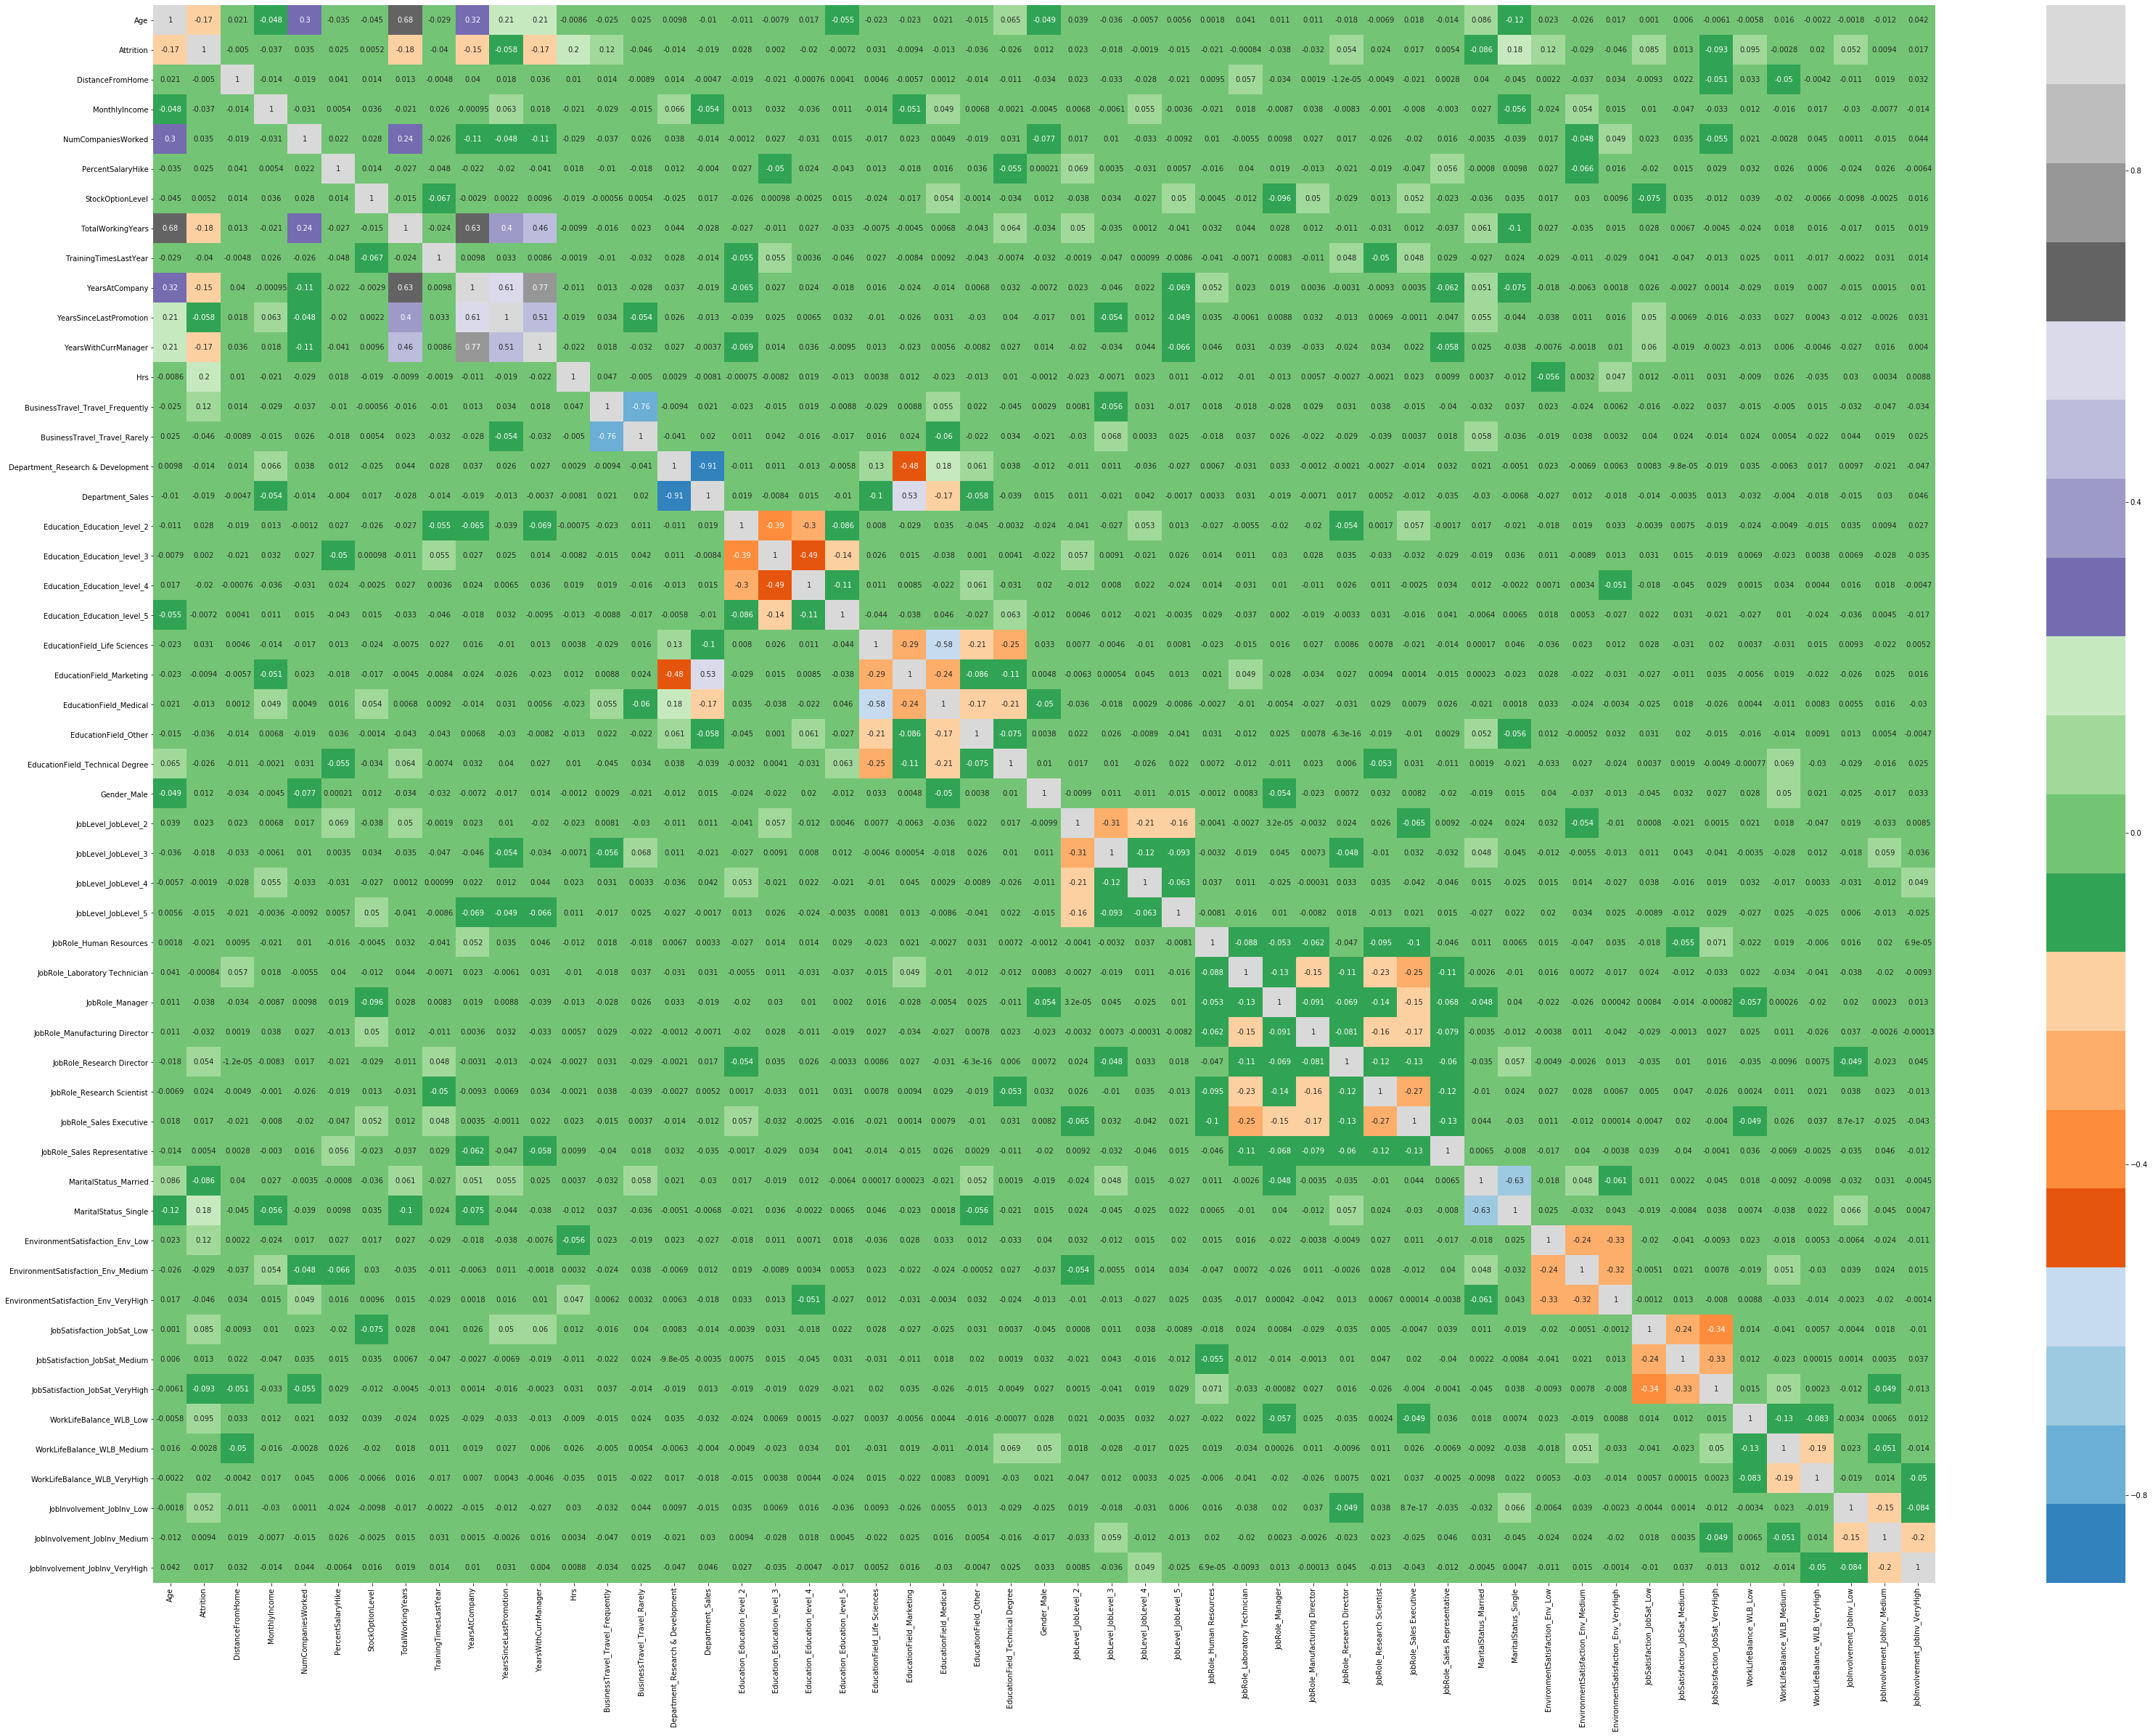

In [69]:
plt.subplots(figsize = (55,40))
sns.heatmap(df_train.corr(),annot = True, cmap="tab20c")
plt.show()

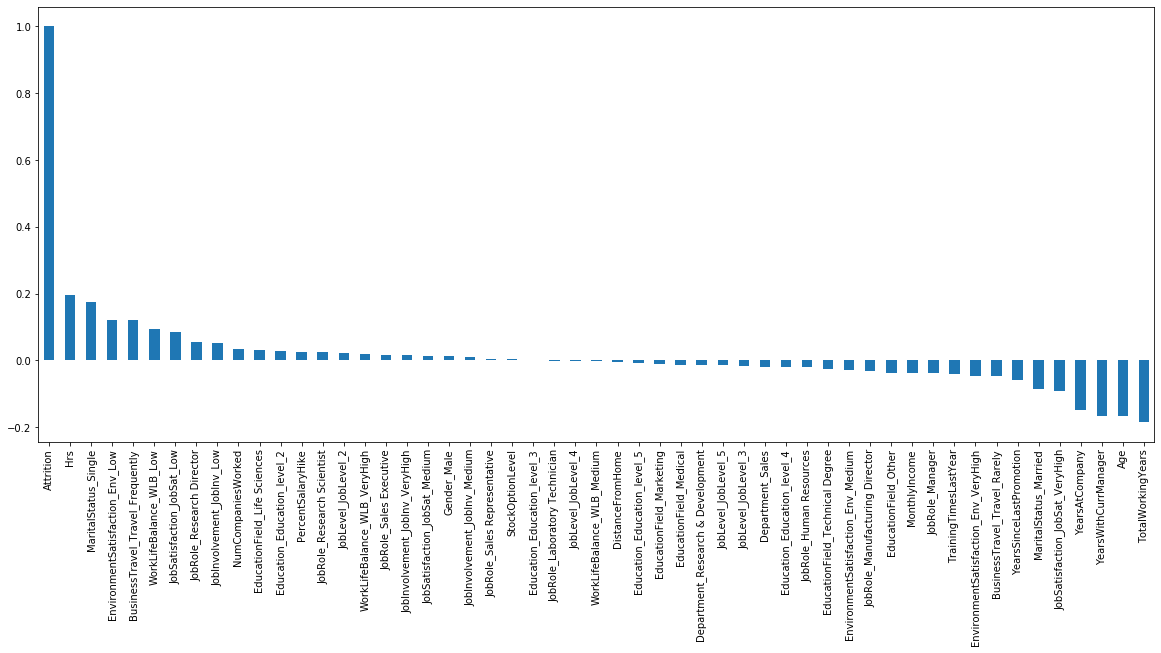

In [70]:
plt.figure(figsize=(20,8))
df_train.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [71]:
y_train = df_train.pop('Attrition')
X_train = df_train

###### Feature Selection

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Eeshwar\Anaconda3\envs\tensorflow-sessions\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2957
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1017.7
Date:                Thu, 17 Jun 2021   Deviance:                       2035.4
Time:                        19:52:35   Pearson chi2:                 5.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.2946      0.544     -6.053      0.000      -4.362      -2.228
Age                                     -0.2993      0.081     -3.678      0.000      -0.459      -0.140
DistanceFromHome                        -0.0312      0.059     -0.528      0.597      -0.147       0.085
MonthlyIncome                           -0.0673      0.060     -1.116      0.264      -0.185       0.051
NumCompaniesWorked                       0.3733      0.063      5.940      0.000       0.250       0.497
PercentSalaryHike                        0.0148      0.057      0.260      0.795      -0.097       0.126
StockOptionLevel                        -0.0208      0.058     -0.359      0.719      -0.134       0.093
TotalWorkingYears                       -0.7170      0.132     -5.448      0.000      -0.975      -0.459
TrainingTimesLastYear                   -0.2179      0.060     -3.616      0.000      -0.336      -0.100
YearsAtCompany                           0.3104      0.150      2.071      0.038       0.017       0.604
YearsSinceLastPromotion                  0.4212      0.087      4.841      0.000       0.251       0.592
YearsWithCurrManager                    -0.6271      0.110     -5.693      0.000      -0.843      -0.411
Hrs                                      0.6201      0.056     11.123      0.000       0.511       0.729
BusinessTravel_Travel_Frequently         1.7208      0.276      6.230      0.000       1.179       2.262
BusinessTravel_Travel_Rarely             0.8747      0.260      3.365      0.001       0.365       1.384
Department_Research & Development       -0.8564      0.318     -2.689      0.007      -1.481      -0.232
Department_Sales                        -0.8902      0.335     -2.654      0.008      -1.548      -0.233
Education_Education_level_2              0.0846      0.217      0.389      0.697      -0.341       0.511
Education_Education_level_3             -0.0143      0.198     -0.072      0.943      -0.402       0.373
Education_Education_level_4             -0.0912      0.207     -0.440      0.660      -0.498       0.315
Education_Education_level_5             -0.5785      0.401     -1.444      0.149      -1.364       0.207
EducationField_Life Sciences            -0.0030      0.468     -0.006      0.995      -0.920       0.914
EducationField_Marketing                -0.3071      0.511     -0.600      0.548      -1.309       0.695
EducationField_Medical                  -0.2039      0.467     -0.437      0.662      -1.119       0.711
EducationField_Other                    -0.5607      0.530     -1.057      0.290      -1.600       0.479
EducationField_Technical Degree         -0.1376      0.497     -0.277      0.782      -1.111       0.836
Gender_Male                           

In [73]:
logreg = LogisticRegression()
rfe = RFE(logreg,14)
rfe = rfe.fit(X_train,y_train)

In [74]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False, False])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 11),
 ('DistanceFromHome', False, 34),
 ('MonthlyIncome', False, 31),
 ('NumCompaniesWorked', False, 10),
 ('PercentSalaryHike', False, 38),
 ('StockOptionLevel', False, 37),
 ('TotalWorkingYears', True, 1),
 ('TrainingTimesLastYear', False, 22),
 ('YearsAtCompany', False, 12),
 ('YearsSinceLastPromotion', False, 6),
 ('YearsWithCurrManager', False, 4),
 ('Hrs', True, 1),
 ('BusinessTravel_Travel_Frequently', True, 1),
 ('BusinessTravel_Travel_Rarely', True, 1),
 ('Department_Research & Development', True, 1),
 ('Department_Sales', True, 1),
 ('Education_Education_level_2', False, 26),
 ('Education_Education_level_3', False, 39),
 ('Education_Education_level_4', False, 30),
 ('Education_Education_level_5', False, 7),
 ('EducationField_Life Sciences', False, 33),
 ('EducationField_Marketing', False, 21),
 ('EducationField_Medical', False, 24),
 ('EducationField_Other', False, 3),
 ('EducationField_Technical Degree', False, 25),
 ('Gender_Male', False, 32),
 ('JobLevel_Jo

In [76]:
cols = list(X_train.columns[rfe.support_])
cols

['TotalWorkingYears',
 'Hrs',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'JobLevel_JobLevel_5',
 'JobRole_Manager',
 'JobRole_Research Director',
 'MaritalStatus_Single',
 'EnvironmentSatisfaction_Env_Low',
 'JobSatisfaction_JobSat_VeryHigh',
 'WorkLifeBalance_WLB_Low',
 'JobInvolvement_JobInv_Low']

###### Accesing the model with the statsmodel

###### Model 1

In [77]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

C:\Users\Eeshwar\Anaconda3\envs\tensorflow-sessions\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1095.1
Date:                Thu, 17 Jun 2021   Deviance:                       2190.3
Time:                        19:52:37   Pearson chi2:                 4.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.5895      0.332     -7.792      0.000      -3.241      -1.938
TotalWorkingYears                    -0.6925      0.072     -9.634      0.000      -0.833      -0.552
Hrs                                   0.5812      0.052     11.100      0.000       0.479       0.684
BusinessTravel_Travel_Frequently      1.6816      0.266      6.316      0.000       1.160       2.203
BusinessTravel_Travel_Rarely          0.9826      0.252      3.898      0.000       0.489       1.477
Department_Research & Development    -0.8054      0.227     -3.546      0.000      -1.251      -0.360
Department_Sales                     -0.8788      0.238     -3.691      0.000      -1.346      -0.412
JobLevel_JobLevel_5                  -0.5526      0.283     -1.952      0.051      -1.107       0.002
JobRole_Manager                      -0.4935      0.246     -2.004      0.045      -0.976      -0.011
JobRole_Research Director             0.5886      0.209      2.812      0.005       0.178       0.999
MaritalStatus_Single                  0.9239      0.111      8.323      0.000       0.706       1.141
EnvironmentSatisfaction_Env_Low       0.9053      0.126      7.196      0.000       0.659       1.152
JobSatisfaction_JobSat_VeryHigh      -0.8489      0.129     -6.564      0.000      -1.102      -0.595
WorkLifeBalance_WLB_Low               1.0466      0.198      5.278      0.000       0.658       1.435
JobInvolvement_JobInv_Low             0.4816      0.207      2.321      0.020       0.075       0.888
=====================================================================================================
"""

In [78]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3055    0.070751
1262    0.365221
1675    0.638786
2410    0.046744
4404    0.116475
2905    0.083893
2883    0.050772
2732    0.374171
2063    0.018677
1636    0.008647
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0707505 , 0.36522069, 0.63878555, 0.04674401, 0.11647533,
       0.08389272, 0.05077203, 0.374171  , 0.01867668, 0.00864681])

In [80]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Attrition,Attrition_Prob,CustID
0,0,0.070751,3055
1,1,0.365221,1262
2,1,0.638786,1675
3,0,0.046744,2410
4,0,0.116475,4404


In [81]:
y_train_pred_final['Predicted'] = y_train_pred_final.Attrition_Prob.apply(lambda x: 1 if x > 0.5 else 0)

In [82]:
y_train_pred_final

,Attrition,Attrition_Prob,CustID,Predicted
0,0,0.070751,3055,0
1,1,0.365221,1262,0
2,1,0.638786,1675,1
3,0,0.046744,2410,0
4,0,0.116475,4404,0
...,...,...,...,...
3005,1,0.633806,4254,1
3006,0,0.049844,1948,0
3007,0,0.026307,365,0
3008,0,0.022836,82,0


In [83]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.Predicted)
print(confusion)

[[2467   45]
 [ 397  101]]


In [84]:
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.Predicted))

0.8531561461794019


###### VIF

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,BusinessTravel_Travel_Rarely,5.85
4,Department_Research & Development,5.34
5,Department_Sales,3.21
2,BusinessTravel_Travel_Frequently,2.37
9,MaritalStatus_Single,1.50
11,JobSatisfaction_JobSat_VeryHigh,1.45
10,EnvironmentSatisfaction_Env_Low,1.24
7,JobRole_Manager,1.09
8,JobRole_Research Director,1.08
12,WorkLifeBalance_WLB_Low,1.07


###### Model 2

In [86]:
X_train_sm.drop('JobLevel_JobLevel_5',inplace = True,axis = 1)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe = logm2.fit()
rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2996
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1097.2
Date:                Thu, 17 Jun 2021   Deviance:                       2194.4
Time:                        19:52:37   Pearson chi2:                 4.98e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6261      0.332     -7.904      0.000      -3.277      -1.975
TotalWorkingYears                    -0.6860      0.072     -9.567      0.000      -0.827      -0.545
Hrs                                   0.5770      0.052     11.058      0.000       0.475       0.679
BusinessTravel_Travel_Frequently      1.6854      0.266      6.331      0.000       1.164       2.207
BusinessTravel_Travel_Rarely          0.9768      0.252      3.877      0.000       0.483       1.471
Department_Research & Development    -0.7733      0.227     -3.409      0.001      -1.218      -0.329
Department_Sales                     -0.8473      0.238     -3.563      0.000      -1.313      -0.381
JobRole_Manager                      -0.5021      0.247     -2.034      0.042      -0.986      -0.018
JobRole_Research Director             0.5643      0.209      2.697      0.007       0.154       0.974
MaritalStatus_Single                  0.9128      0.111      8.241      0.000       0.696       1.130
EnvironmentSatisfaction_Env_Low       0.8952      0.126      7.129      0.000       0.649       1.141
JobSatisfaction_JobSat_VeryHigh      -0.8553      0.129     -6.616      0.000      -1.109      -0.602
WorkLifeBalance_WLB_Low               1.0533      0.199      5.305      0.000       0.664       1.442
JobInvolvement_JobInv_Low             0.4740      0.207      2.285      0.022       0.067       0.881
=====================================================================================================
"""

In [87]:
y_train_pred = rfe.predict(X_train_sm)
y_train_pred[:10]

3055    0.070008
1262    0.357496
1675    0.629136
2410    0.045833
4404    0.113216
2905    0.082911
2883    0.049756
2732    0.366301
2063    0.018679
1636    0.008600
dtype: float64

In [88]:
y_train_pred = y_train_pred.values.reshape(-1)

In [89]:
y_train_pred_final = pd.DataFrame({'Attrition': y_train.values, 'Attrition_Prob': y_train_pred, 'CustID': y_train.index})

In [90]:
y_train_pred_final['Predicted'] = y_train_pred_final.Attrition_Prob.apply(lambda x: 1 if x > 0.5 else 0)

In [91]:
y_train_pred_final.head()

,Attrition,Attrition_Prob,CustID,Predicted
0,0,0.070008,3055,0
1,1,0.357496,1262,0
2,1,0.629136,1675,1
3,0,0.045833,2410,0
4,0,0.113216,4404,0


In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.Predicted)
confusion

array([[2465,   47],
       [ 395,  103]], dtype=int64)

In [93]:
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.Predicted))

0.8531561461794019


In [94]:
X_train_sm1 = X_train_sm.drop('const',axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values,i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,BusinessTravel_Travel_Rarely,5.82
4,Department_Research & Development,5.34
5,Department_Sales,3.21
2,BusinessTravel_Travel_Frequently,2.37
8,MaritalStatus_Single,1.50
10,JobSatisfaction_JobSat_VeryHigh,1.45
9,EnvironmentSatisfaction_Env_Low,1.24
6,JobRole_Manager,1.09
7,JobRole_Research Director,1.08
11,WorkLifeBalance_WLB_Low,1.07


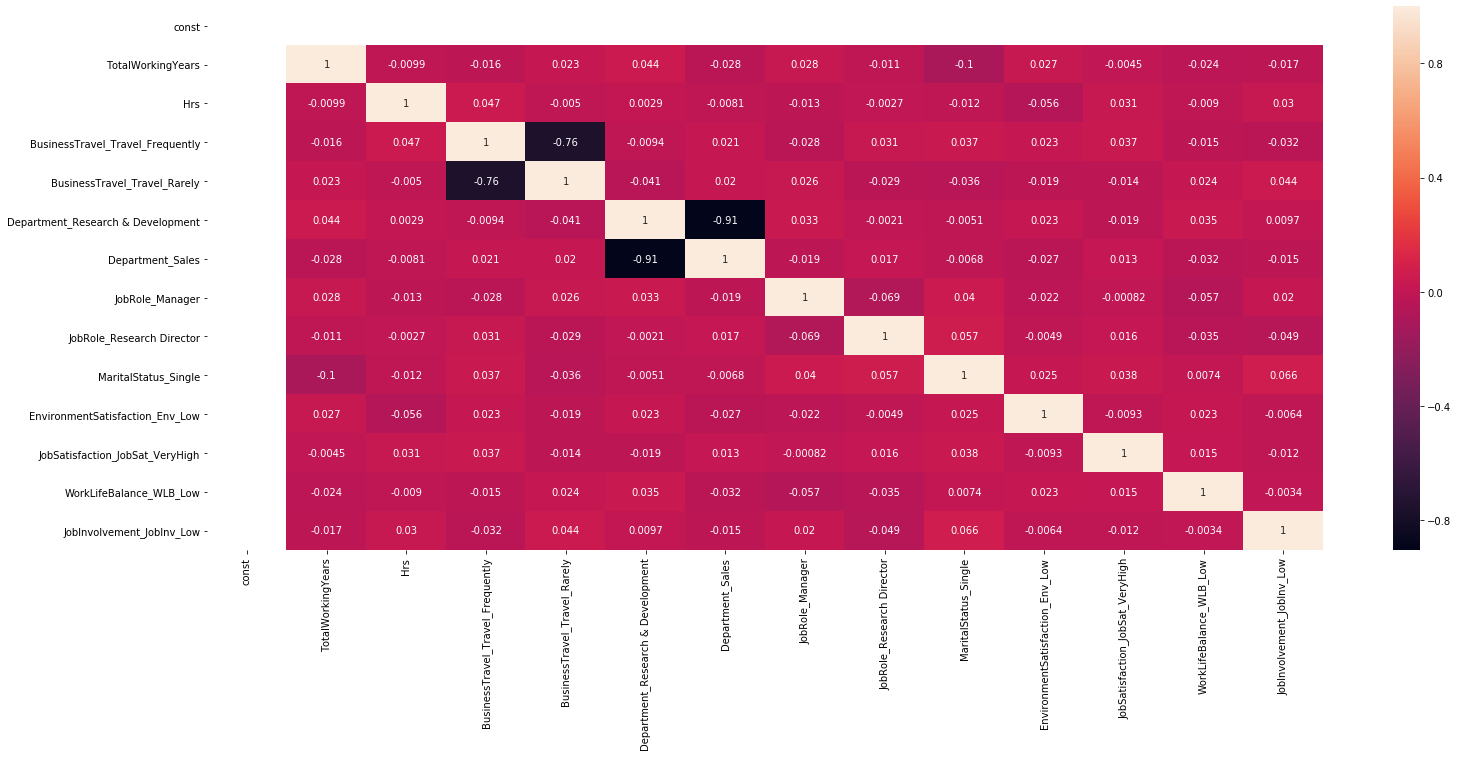

In [95]:
plt.subplots(figsize = (25,10))
sns.heatmap(X_train_sm.corr(),annot = True)
plt.show()

###### Model 3

In [96]:
X_train_sm.drop('BusinessTravel_Travel_Rarely',inplace = True, axis = 1)

In [97]:
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe = logm3.fit()
rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2997
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1106.3
Date:                Thu, 17 Jun 2021   Deviance:                       2212.7
Time:                        19:52:41   Pearson chi2:                 5.17e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.7029      0.229     -7.451      0.000      -2.151      -1.255
TotalWorkingYears                    -0.6804      0.072     -9.503      0.000      -0.821      -0.540
Hrs                                   0.5823      0.052     11.217      0.000       0.481       0.684
BusinessTravel_Travel_Frequently      0.7983      0.124      6.416      0.000       0.554       1.042
Department_Research & Development    -0.8191      0.227     -3.610      0.000      -1.264      -0.374
Department_Sales                     -0.8689      0.238     -3.650      0.000      -1.336      -0.402
JobRole_Manager                      -0.4820      0.246     -1.960      0.050      -0.964    1.56e-05
JobRole_Research Director             0.5763      0.207      2.781      0.005       0.170       0.983
MaritalStatus_Single                  0.9012      0.110      8.174      0.000       0.685       1.117
EnvironmentSatisfaction_Env_Low       0.8813      0.125      7.051      0.000       0.636       1.126
JobSatisfaction_JobSat_VeryHigh      -0.8390      0.129     -6.516      0.000      -1.091      -0.587
WorkLifeBalance_WLB_Low               1.0627      0.198      5.371      0.000       0.675       1.451
JobInvolvement_JobInv_Low             0.4876      0.206      2.365      0.018       0.084       0.892
=====================================================================================================
"""

In [98]:
y_train_pred = rfe.predict(X_train_sm)
y_train_pred[:10]

3055    0.064645
1262    0.335433
1675    0.617442
2410    0.105525
4404    0.105907
2905    0.074750
2883    0.114028
2732    0.344065
2063    0.017290
1636    0.007889
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)

In [100]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values,'Attrition_Prob':y_train_pred,'CustID': y_train.index})

In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final.Attrition_Prob.apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final

,Attrition,Attrition_Prob,CustID,Predicted
0,0,0.064645,3055,0
1,1,0.335433,1262,0
2,1,0.617442,1675,1
3,0,0.105525,2410,0
4,0,0.105907,4404,0
...,...,...,...,...
3005,1,0.630813,4254,1
3006,0,0.045421,1948,0
3007,0,0.044700,365,0
3008,0,0.021070,82,0


In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.Predicted)
confusion

array([[2464,   48],
       [ 401,   97]], dtype=int64)

In [103]:
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.Predicted))

0.8508305647840532


In [104]:
X_train_sm1 = X_train_sm.drop('const',axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values,i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,Department_Research & Development,1.97
7,MaritalStatus_Single,1.49
4,Department_Sales,1.44
9,JobSatisfaction_JobSat_VeryHigh,1.43
2,BusinessTravel_Travel_Frequently,1.24
8,EnvironmentSatisfaction_Env_Low,1.24
5,JobRole_Manager,1.09
6,JobRole_Research Director,1.08
10,WorkLifeBalance_WLB_Low,1.07
11,JobInvolvement_JobInv_Low,1.07


###### Model 4

In [105]:
X_train_sm.drop('JobRole_Manager',inplace = True, axis = 1)
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
rfe = logm3.fit()
rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2998
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1108.4
Date:                Thu, 17 Jun 2021   Deviance:                       2216.8
Time:                        19:52:41   Pearson chi2:                 4.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.7081      0.229     -7.467      0.000      -2.156      -1.260
TotalWorkingYears                    -0.6752      0.071     -9.473      0.000      -0.815      -0.536
Hrs                                   0.5818      0.052     11.214      0.000       0.480       0.683
BusinessTravel_Travel_Frequently      0.7991      0.124      6.423      0.000       0.555       1.043
Department_Research & Development    -0.8456      0.227     -3.725      0.000      -1.291      -0.401
Department_Sales                     -0.8860      0.238     -3.718      0.000      -1.353      -0.419
JobRole_Research Director             0.6090      0.207      2.948      0.003       0.204       1.014
MaritalStatus_Single                  0.8918      0.110      8.106      0.000       0.676       1.107
EnvironmentSatisfaction_Env_Low       0.8796      0.125      7.042      0.000       0.635       1.124
JobSatisfaction_JobSat_VeryHigh      -0.8316      0.128     -6.473      0.000      -1.083      -0.580
WorkLifeBalance_WLB_Low               1.0870      0.198      5.495      0.000       0.699       1.475
JobInvolvement_JobInv_Low             0.4754      0.206      2.310      0.021       0.072       0.879
=====================================================================================================
"""

In [106]:
y_train_pred = rfe.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)

In [107]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values,'Attrition_Prob':y_train_pred,'CustID': y_train.index})
y_train_pred_final['Predicted'] = y_train_pred_final.Attrition_Prob.apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final

,Attrition,Attrition_Prob,CustID,Predicted
0,0,0.063095,3055,0
1,1,0.324890,1262,0
2,1,0.612769,1675,1
3,0,0.102921,2410,0
4,0,0.103303,4404,0
...,...,...,...,...
3005,1,0.623405,4254,1
3006,0,0.045944,1948,0
3007,0,0.043692,365,0
3008,0,0.020732,82,0


In [108]:
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.Predicted)
confusion

array([[2466,   46],
       [ 400,   98]], dtype=int64)

In [109]:
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.Predicted))

0.8518272425249169


In [110]:
X_train_sm1 = X_train_sm.drop('const',axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values,i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,Department_Research & Development,1.90
6,MaritalStatus_Single,1.49
8,JobSatisfaction_JobSat_VeryHigh,1.43
4,Department_Sales,1.42
2,BusinessTravel_Travel_Frequently,1.24
7,EnvironmentSatisfaction_Env_Low,1.24
5,JobRole_Research Director,1.07
10,JobInvolvement_JobInv_Low,1.07
9,WorkLifeBalance_WLB_Low,1.06
0,TotalWorkingYears,1.01


###### Metrics Beyond Simple Accuracy

In [111]:
TP = confusion[1][1]
FP = confusion[0][1]
TN = confusion[0][0]
FN = confusion[1][0]

In [112]:
sensitivity = TP / (TP + FN)
print(sensitivity)

0.19678714859437751


In [113]:
specificity = TN / (TN + FP)
print(specificity)

0.981687898089172


In [114]:
Precision = TP/(TP + FP)
print(Precision)

0.6805555555555556


In [115]:
Recall = TP / (TP + FN)
print(Recall)

0.19678714859437751


In [116]:
Positive_Rate = TP/(TP + FP)
print(Positive_Rate)

0.6805555555555556


In [117]:
Negative_Rate = TN/(FN + TN)
print(Negative_Rate)

0.8604326587578507


###### Plotting the ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

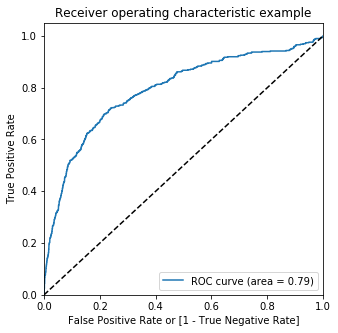

In [119]:
#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

###### Finiding the Optimal Cutoff Point

In [120]:
numbers = [float(x)/10 for x in range(10)]
#num = [0.0,0.1,0.12,0.14,0.15,0.17,0.19,0.2]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Attrition,Attrition_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.063095,3055,0,1,0,0,0,0,0,0,0,0,0
1,1,0.324890,1262,0,1,1,1,1,0,0,0,0,0,0
2,1,0.612769,1675,1,1,1,1,1,1,1,1,0,0,0
3,0,0.102921,2410,0,1,1,0,0,0,0,0,0,0,0
4,0,0.103303,4404,0,1,1,0,0,0,0,0,0,0,0


##### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [121]:
cutoff_df = pd.DataFrame(columns = ['probability','accuracy','Sensitivity','Specificity'])
for i in numbers: 
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
cutoff_df

,probability,accuracy,Sensitivity,Specificity
0.0,0.0,0.165449,1.000000,0.000000
0.1,0.1,0.581063,0.855422,0.526672
0.2,0.2,0.770100,0.694779,0.785032
0.3,0.3,0.841528,0.520080,0.905255
0.4,0.4,0.848173,0.323293,0.952229
0.5,0.5,0.851827,0.196787,0.981688
0.6,0.6,0.846512,0.108434,0.992834
0.7,0.7,0.844186,0.074297,0.996815
0.8,0.8,0.838206,0.024096,0.999602
0.9,0.9,0.834884,0.002008,1.000000


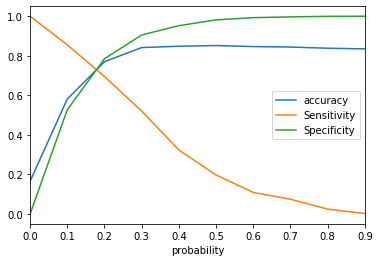

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','Sensitivity','Specificity'])
plt.show()

###### Above curve shows that the optimal cutoff point is 0.2, hence we create a new column final_Predicted and determine the output Attrition

In [123]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Attrition_Prob.apply(lambda x: 1 if x>0.2 else 0)
y_train_pred_final

,Attrition,Attrition_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.063095,3055,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.324890,1262,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.612769,1675,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.102921,2410,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.103303,4404,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,1,0.623405,4254,1,1,1,1,1,1,1,1,0,0,0,1
3006,0,0.045944,1948,0,1,0,0,0,0,0,0,0,0,0,0
3007,0,0.043692,365,0,1,0,0,0,0,0,0,0,0,0,0
3008,0,0.020732,82,0,1,0,0,0,0,0,0,0,0,0,0


In [124]:
metrics.accuracy_score(y_train_pred_final.Attrition,y_train_pred_final.final_Predicted)

0.7700996677740863

In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition,y_train_pred_final.final_Predicted)
confusion

array([[1972,  540],
       [ 152,  346]], dtype=int64)

In [126]:
TP = confusion[1][1]
FP = confusion[0][1]
TN = confusion[0][0]
FN = confusion[1][0]

In [127]:
sensitivity = TP / (TP + FN)
print(100* round(sensitivity,2))

69.0


In [128]:
specificity = TN / (TN + FP)
print(100* round(specificity,2))

79.0


In [129]:
Precision = TP/(TP + FP)
print(100* round(Precision,2))

39.0


In [130]:
Recall = TP / (TP + FN)
print(100* round(Recall,2))

69.0


In [131]:
Positive_Predictive_Rate = TP/(TP + FP)
print(100* round(Positive_Predictive_Rate,2))

39.0


In [132]:
Negative_Predictive_Rate = TN/(FN + TN)
print(100* round(Negative_Predictive_Rate,2))

93.0
